In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

sharminakther111_sharmin_akther_path = kagglehub.dataset_download('sharminakther111/sharmin-akther')

print('Data source import complete.')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load the dataset
data = pd.read_csv("/kaggle/input/sharmin-akther/tourism_trends_dataset.csv")
print(data.head())

     ID Category        Date  Tourist Count  Average Spend ($)     Label
0  ID_1   Type C  2018-01-01            548             292.71  Positive
1  ID_2   Type D  2018-01-02            616              95.53   Neutral
2  ID_3   Type A  2018-01-03             91             346.92   Neutral
3  ID_4   Type A  2018-01-04            870             213.84  Positive
4  ID_5   Type B  2018-01-05            500             247.11  Negative


In [ ]:
#Basic info
print(data.info())

#check for missing values
print(data.isnull().sum)

#summary statistics
print(data.describe())

#unique values in categorical columns
print("Unique Categories:", data['Category'].unique())
print("Unique Labels:", data['Label'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1000 non-null   object 
 1   Category           1000 non-null   object 
 2   Date               1000 non-null   object 
 3   Tourist Count      1000 non-null   int64  
 4   Average Spend ($)  1000 non-null   float64
 5   Label              1000 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 47.0+ KB
None
<bound method DataFrame.sum of         ID  Category   Date  Tourist Count  Average Spend ($)  Label
0    False     False  False          False              False  False
1    False     False  False          False              False  False
2    False     False  False          False              False  False
3    False     False  False          False              False  False
4    False     False  False          False              False  Fals

In [ ]:
#Drop rows with missing value
data =data.dropna()

#Convert data column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

#Check for duplicates rows
data = data.drop_duplicates()

#Validate data types
print(data.dtypes)


ID                           object
Category                     object
Date                 datetime64[ns]
Tourist Count                 int64
Average Spend ($)           float64
Label                        object
dtype: object


In [ ]:
# Total Tourist by category
total_tourist = data.groupby('Category')['Tourist Count'].sum()
print(total_patients)

Category
Type A    234
Type B    251
Type C    264
Type D    251
Name: Label, dtype: int64


In [ ]:
#Average stay tourist by Category
Average_spend = data.groupby('Label')['Average Spend ($)'].mean()
print(Average_spend)

Label
Negative    254.340000
Neutral     245.961788
Positive    247.889078
Name: Average Spend ($), dtype: float64


In [ ]:
#Monthly Tourism Trends
data['month'] = data['Date'].dt.month
monthly_tourist = data.groupby('month')['Tourist Count'].sum()
print(monthly_trends)

month
1     93
2     85
3     93
4     90
5     93
6     90
7     93
8     93
9     86
10    62
11    60
12    62
Name: Label, dtype: int64


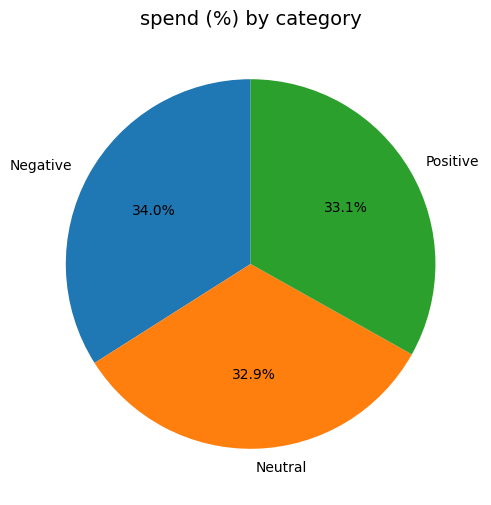

In [ ]:
#Visualization
plt.figure(figsize=(8,6))
plt.pie(Average_spend.values, labels=Average_spend.index, autopct='%1.1f%%', startangle=90)
plt.title("spend by category",fontsize=14)
plt.show()

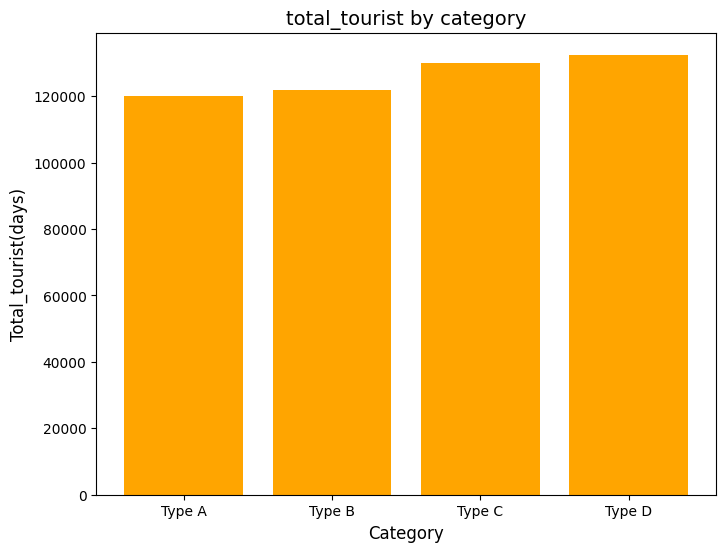

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(total_tourist.index, total_tourist.values, color='orange')
plt.title("total_tourist by category",fontsize=14)
plt.xlabel("Category",fontsize=12)
plt.ylabel("Total_tourist(days)",fontsize=12)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

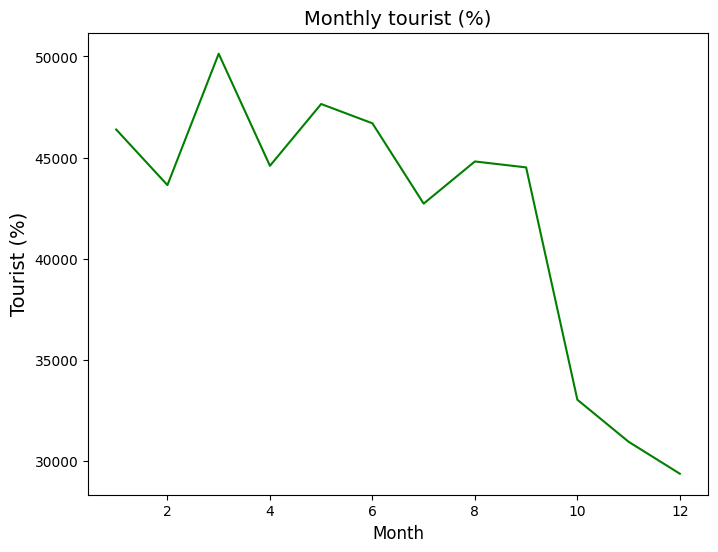

In [ ]:

plt.figure(figsize=(8,6))
plt.plot(monthly_tourist.index, monthly_tourist.values, color='green')
plt.title("Monthly tourist (%)",fontsize=14)
plt.xlabel("Month",fontsize=12)
plt.ylabel("Tourist (%)",fontsize=14)
plt.show